In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
import torch
import os
import numpy as np
from torch.autograd import Variable
import sklearn
import pandas as pd

# Fashion MNIST Data

In [10]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [11]:
X, y = load_mnist('fashion', kind='train')
X_t10k, y_t10k = load_mnist('fashion', kind='t10k')

print(X.shape, y.shape, X_t10k.shape, y_t10k.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [12]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True)

for train_index, test_index in kf.split(X):
  X_train, X_model = X[train_index], X[test_index]
  y_train, y_model = y[train_index], y[test_index]
  
 
print(X_train.shape, y_train.shape, X_model.shape, y_model.shape)

(40000, 784) (40000,) (20000, 784) (20000,)


# PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d_PCA = pca.fit_transform(X)
print(X_2d_PCA.shape)
print(X_2d_PCA)

(60000, 2)
[[ -123.99379079  1633.07439599]
 [ 1407.92885251  -451.64133565]
 [ -725.91079523 -1101.83813752]
 ...
 [  857.75019573 -1180.24018342]
 [ -807.4765258   -581.21887275]
 [-1815.66380929  -119.74334255]]


In [8]:
from sklearn import datasets
target_names=["t-shirt", "trousers", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boot"]
target_ids = range(len(target_names))
print(target_ids)

range(0, 10)


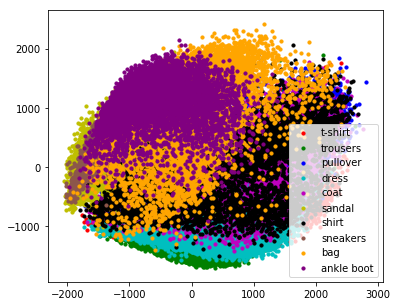

In [11]:
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:brown', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d_PCA[y == i, 0], X_2d_PCA[y == i, 1], s=10, c=c, label=label)
plt.legend()
plt.show()

# ISOMAP

In [16]:
from sklearn.manifold import Isomap
ISO = Isomap(n_neighbors=3, n_jobs=-1, n_components=2)
X_2d_ISO = ISO.fit_transform(X_model)
print(X_2d_ISO.shape)
print(X_2d_ISO)

(20000, 2)
[[  -837.36404021  -3301.74599695]
 [ -2727.02208263  -3030.23507349]
 [  2953.028537    -1215.75626866]
 ...
 [  7616.70829857  -1110.1648427 ]
 [ -1124.49216943  -7720.6695974 ]
 [ -2329.26477388 -10559.4681951 ]]


In [17]:
from sklearn import datasets
target_names=["t-shirt", "trousers", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boot"]
target_ids = range(len(target_names))
print(target_ids)

range(0, 10)


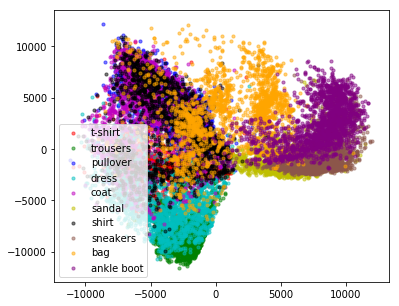

In [18]:
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:brown', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d_ISO[y_model == i, 0], X_2d_ISO[y_model == i, 1], s=10, alpha=alpha, c=c, label=label)
plt.legend()
plt.show()

# TSNE

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_model)
print(X_2d.shape)
print(X_2d)

(20000, 2)
[[-21.030329 -23.382023]
 [-31.088058 -24.194576]
 [-29.664469  16.370531]
 ...
 [  8.979544  59.690968]
 [ -4.864594 -60.891582]
 [ 10.317005 -83.25912 ]]


In [14]:
from sklearn import datasets
target_names=["t-shirt", "trousers", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boot"]
target_ids = range(len(target_names))
print(target_ids)

range(0, 10)


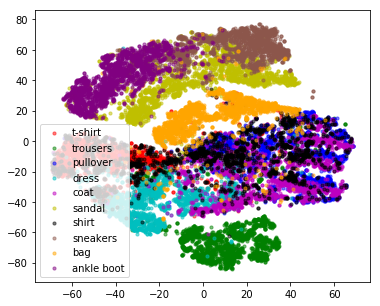

In [15]:
from matplotlib import pyplot as plt
alpha = 0.5
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:brown', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_model == i, 0], X_2d[y_model == i, 1], s=10, alpha=alpha, c=c, label=label)
plt.legend()
plt.show()

# RESNET-18 TSNE

In [2]:
X = pd.read_csv("fashion-mnist/features.csv", header=None)
y = pd.read_csv('fashion-mnist/labels.csv', header=None)
print(X.shape, y.shape)

(60000, 128) (60000, 1)


In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True)
X = X.values
y = y.values
for train_index, test_index in kf.split(X):
  X_train, X_model = X[train_index], X[test_index]
  y_train, y_model = y[train_index], y[test_index]
  
 
print(X_train.shape, y_train.shape, X_model.shape, y_model.shape)

(40000, 128) (40000, 1) (20000, 128) (20000, 1)


In [4]:
y_model = y_model.reshape(20000)
print(y_model)

[4 7 3 ... 2 3 2]


In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_model)
print(X_2d.shape)
print(X_2d)

(20000, 2)
[[ 54.66802  -31.58672 ]
 [-35.677887 -19.43268 ]
 [-24.033524  18.893055]
 ...
 [ 16.503452 -35.212257]
 [  4.046229   2.930001]
 [ 22.804861 -43.70284 ]]


In [6]:
from sklearn import datasets
target_names=["t-shirt", "trousers", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boot"]
target_ids = range(len(target_names))
print(target_ids)

range(0, 10)


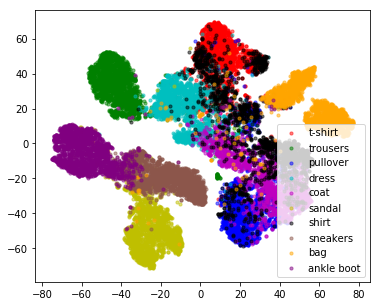

In [9]:
from matplotlib import pyplot as plt
alpha = 0.5
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:brown', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_model == i, 0], X_2d[y_model == i, 1], s=10, alpha=alpha, c=c, label=label)
plt.legend()
plt.show()

# Altered code from Fashion MNIST

# model.py

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import utils
import math
from torch.autograd import Variable

class FashionSimpleNet(nn.Module):

    """ Simple network"""

    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1,32, kernel_size=3, padding=1), # 28
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # 14

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) # 7
        )
        self.classifier1 = nn.Sequential(
            nn.Dropout(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(inplace=True),
        )

        self.classifier2 = nn.Sequential(
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 64 * 7 * 7)
        x = self.classifier1(x)
        x = self.classifier2(x)
        return x

    def extractFeatures(self,x):
        x = self.features(x)
        x = x.view(x.size(0), 64 * 7 * 7)
        x = self.classifier1(x)
        return x

# train.py

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import DataLoader
from fashionmnist import FashionMNIST
from torchvision import datasets
import model
import utils
import time
import argparse
import os
import numpy as np
import csv


parser = argparse.ArgumentParser()
parser.add_argument("--model", type=str, default='FashionSimpleNet', help="model")
parser.add_argument("--patience", type=int, default=5, help="early stopping patience")
parser.add_argument("--batch_size", type=int, default=1, help="batch size")
parser.add_argument("--nepochs", type=int, default=5, help="max epochs")
parser.add_argument("--nocuda", action='store_true', help="no cuda used")
parser.add_argument("--nworkers", type=int, default=4, help="number of workers")
parser.add_argument("--seed", type=int, default=1, help="random seed")
parser.add_argument("--data", type=str, default='fashion', help="mnist or fashion")
args = parser.parse_args()

cuda = not args.nocuda and torch.cuda.is_available() # use cuda
print('Training on cuda: {}'.format(cuda))

# Set seeds. If using numpy this must be seeded too.
torch.manual_seed(args.seed)
if cuda:
    torch.cuda.manual_seed(args.seed)

# Setup folders for saved models and logs
if not os.path.exists('saved-models/'):
    os.mkdir('saved-models/')
if not os.path.exists('logs/'):
    os.mkdir('logs/')

# Setup tensorboard folders. Each run must have it's own folder. Creates
# a logs folder for each model and each run.
out_dir = 'logs/{}'.format(args.model)
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
run = 0
current_dir = '{}/run-{}'.format(out_dir, run)
while os.path.exists(current_dir):
	run += 1
	current_dir = '{}/run-{}'.format(out_dir, run)
os.mkdir(current_dir)
logfile = open('{}/log.txt'.format(current_dir), 'w')
print(args, file=logfile)

# Tensorboard viz. tensorboard --logdir {yourlogdir}. Requires tensorflow.
from tensorboard_logger import configure, log_value
configure(current_dir, flush_secs=5)

# Define transforms.
# normalize = transforms.Normalize((0.1307,), (0.3081,)
train_transforms = transforms.Compose([
                        # transforms.RandomHorizontalFlip(),
                        # utils.RandomRotation(),
                        # utils.RandomTranslation(),
                        # utils.RandomVerticalFlip(),
                        transforms.ToTensor()
                        # transforms.Normalize((0.1307,), (0.3081,))
                        ]
                        )
val_transforms = transforms.Compose([
                        transforms.ToTensor()
                        # transforms.Normalize((0.1307,), (0.3081,))
                        ])

# Create dataloaders. Use pin memory if cuda.
kwargs = {'pin_memory': True} if cuda else {}
if(args.data == 'mnist'):
    trainset = datasets.MNIST('data-mnist', train=True, download=True, transform=train_transforms)
    train_loader = DataLoader(trainset, batch_size=args.batch_size,
                            shuffle=True, num_workers=args.nworkers, **kwargs)
    valset = datasets.MNIST('data-mnist', train=False, transform=val_transforms)
    val_loader = DataLoader(valset, batch_size=args.batch_size,
                            shuffle=False, num_workers=args.nworkers, **kwargs)
else:
    trainset = FashionMNIST('data', train=True, download=True, transform=train_transforms)
    train_loader = DataLoader(trainset, batch_size=args.batch_size,
                            shuffle=True, num_workers=args.nworkers, **kwargs)
    valset = FashionMNIST('data', train=False, transform=val_transforms)
    val_loader = DataLoader(valset, batch_size=args.batch_size,
                            shuffle=False, num_workers=args.nworkers, **kwargs)

def train(net, loader, criterion, optimizer, save):
    net.train()
    running_loss = 0
    running_accuracy = 0

    if save == False:
        for i, (X,y) in enumerate(loader):

            if cuda:
                X, y = X.cuda(), y.cuda()
            X, y = Variable(X), Variable(y)

            output = net(X)

            loss = criterion(output, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.data[0]
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            running_accuracy += pred.eq(y.data.view_as(pred)).cpu().sum()

    else:

        labels = []

        with open("features.csv","w",newline="") as f:
            cw = csv.writer(f)

            for i, (X,y) in enumerate(loader):
                if cuda:
                    X, y = X.cuda(), y.cuda()
                X, y = Variable(X), Variable(y)
                features = net.extractFeatures(X)
                labels.append(y.data)
                cw.writerows(features.data)
        print("features saved")
        with open("labels.csv", "w", newline="") as l:
            cl = csv.writer(l)
            cl.writerows(labels)
        print("labels saved")

    return running_loss/len(loader), running_accuracy/len(loader.dataset)

def validate(net, loader, criterion):
    net.eval()
    running_loss = 0
    running_accuracy = 0
    for i, (X,y) in enumerate(loader):
        if cuda:
            X, y = X.cuda(), y.cuda()
        X, y = Variable(X, volatile=True), Variable(y)
        output = net(X)
        loss = criterion(output, y)
        running_loss += loss.data[0]
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        running_accuracy += pred.eq(y.data.view_as(pred)).cpu().sum()
    return running_loss/len(loader), running_accuracy/len(loader.dataset)


if __name__ == '__main__':
    net = model.__dict__[args.model]()
    print(net)
    criterion = torch.nn.CrossEntropyLoss()

    if cuda:
        net, criterion = net.cuda(), criterion.cuda()
    # early stopping parameters
    patience = args.patience
    best_loss = 1e4

    # Print model to logfile
    print(net, file=logfile)

    # Change optimizer for finetuning
    optimizer = optim.Adam(net.parameters())

    for e in range(args.nepochs):
        save = False
        if e ==4:
            save = True
        start = time.time()
        train_loss, train_acc = train(net, train_loader,
            criterion, optimizer, save)
        val_loss, val_acc = validate(net, val_loader, criterion)
        end = time.time()

        # print stats
        stats ="""Epoch: {}\t train loss: {:.3f}, train acc: {:.3f}\t
                val loss: {:.3f}, val acc: {:.3f}\t
                time: {:.1f}s""".format( e, train_loss, train_acc, val_loss,
                val_acc, end-start)
        print(stats)
        print(stats, file=logfile)
        log_value('train_loss', train_loss, e)
        log_value('val_loss', val_loss, e)
        log_value('train_acc', train_acc, e)
        log_value('val_acc', val_acc, e)


        #early stopping and save best model
        if val_loss < best_loss:
            best_loss = val_loss
            patience = args.patience
            utils.save_model({
                'arch': args.model,
                'state_dict': net.state_dict()
            }, 'saved-models/{}-run-{}.pth.tar'.format(args.model, run))
        else:
            patience -= 1
            if patience == 0:
                print('Run out of patience!')
                break